<a href="https://colab.research.google.com/github/JH-Y-324/first-repository/blob/master/telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [133]:
import os

os.listdir(path)

['WA_Fn-UseC_-Telco-Customer-Churn.csv']

In [134]:
import pandas as pd

file_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(file_path)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [135]:
df['TotalCharges'].dtype

dtype('O')

In [136]:
df['TotalCharges'].head(20)

,TotalCharges
0,29.85
1,1889.5
2,108.15
3,1840.75
4,151.65
5,820.5
6,1949.4
7,301.9
8,3046.05
9,3487.95


In [137]:
(df['TotalCharges'] == ' ').sum()

np.int64(11)

In [138]:
invalid = df.loc[
    pd.to_numeric(df['TotalCharges'], errors='coerce').isna(),
    'TotalCharges'
]

invalid.value_counts()

,count
TotalCharges,
,11


In [139]:
df.loc[
    df['TotalCharges'].str.strip() == '',
    ['tenure', 'MonthlyCharges', 'TotalCharges']
]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,
753,0,20.25,
936,0,80.85,
1082,0,25.75,
1340,0,56.05,
3331,0,19.85,
3826,0,25.35,
4380,0,20.00,
5218,0,19.70,
6670,0,73.35,


In [140]:
df['TotalCharges'] = pd.to_numeric(
    df['TotalCharges'].str.strip(),
    errors='coerce'
)

In [141]:
invalid = df.loc[
    pd.to_numeric(df['TotalCharges'], errors='coerce').isna(),
    'TotalCharges'
]

invalid.value_counts()

,count
TotalCharges,


In [142]:
df["Churn"] = (df["Churn"] == "Yes").astype(int)

In [143]:
df.groupby("Contract")["Churn"].mean().sort_values(ascending=False)

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


In [144]:
df.groupby("InternetService")["Churn"].mean().sort_values(ascending=False)

,Churn
InternetService,
Fiber optic,0.418928
DSL,0.189591
No,0.074050


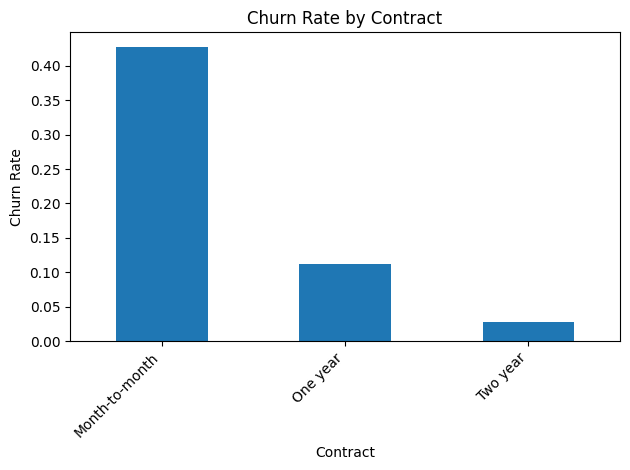

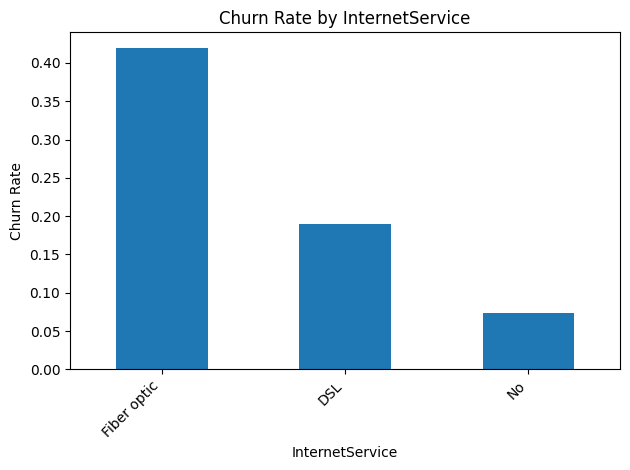

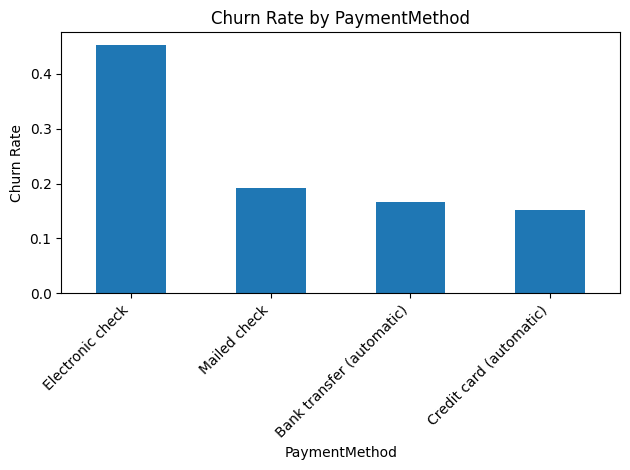

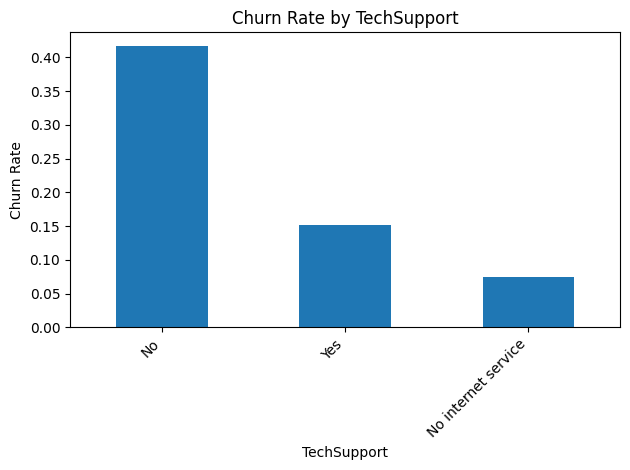

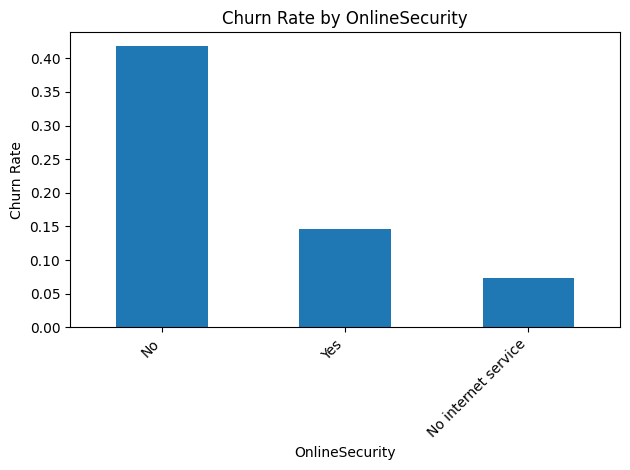

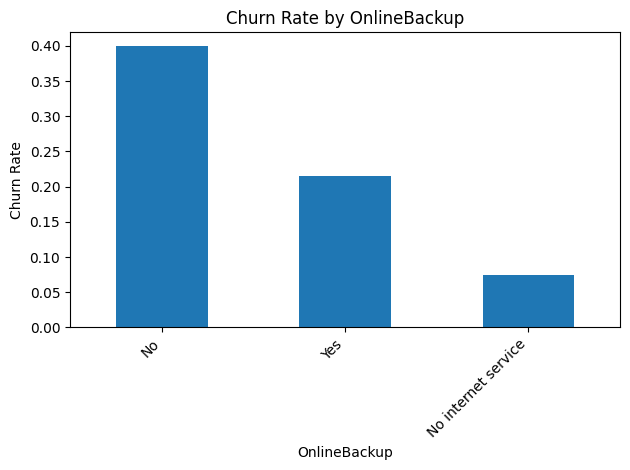

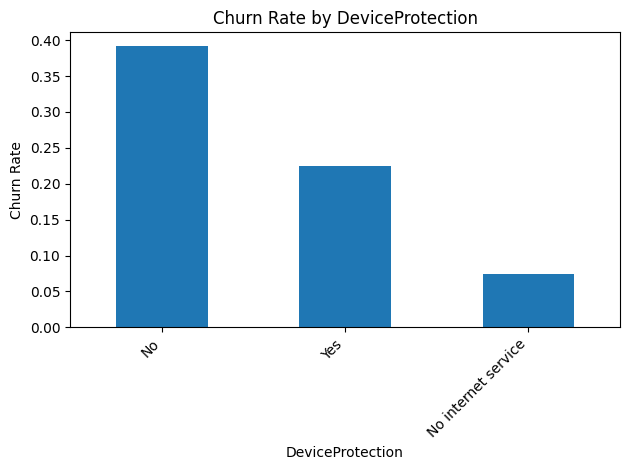

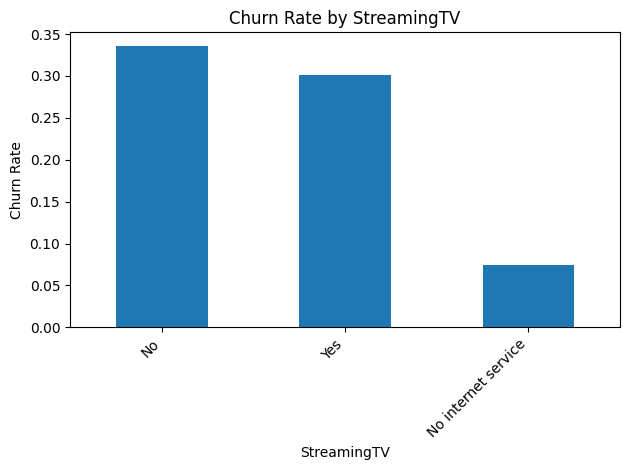

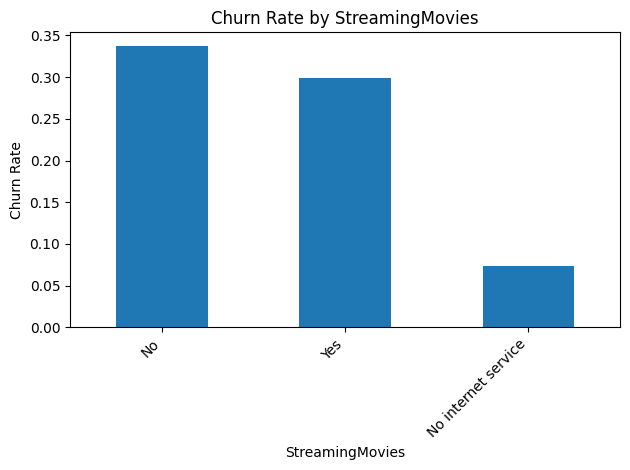

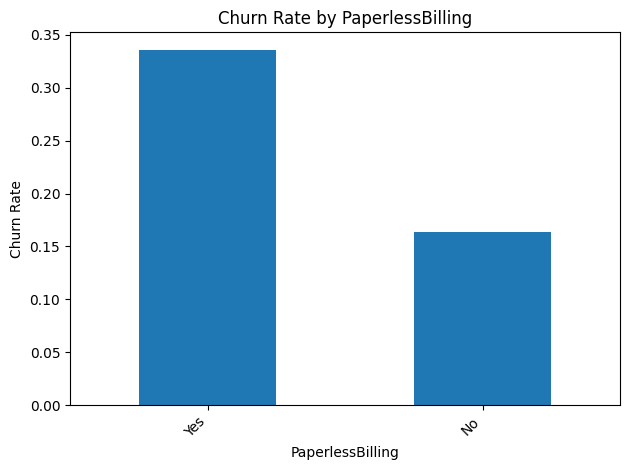

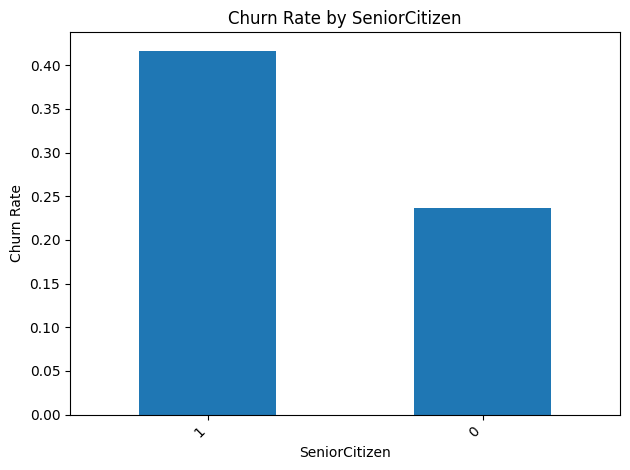

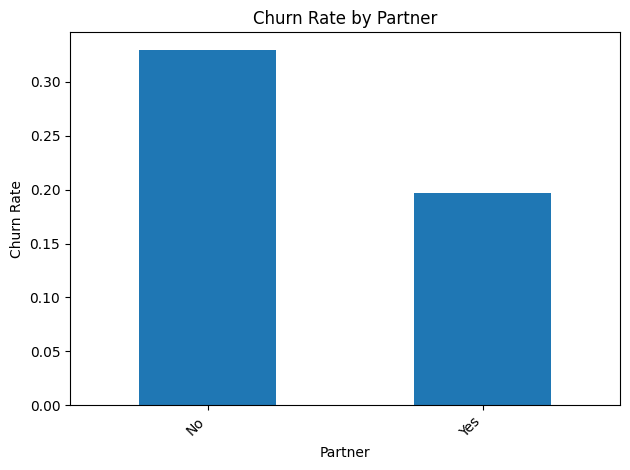

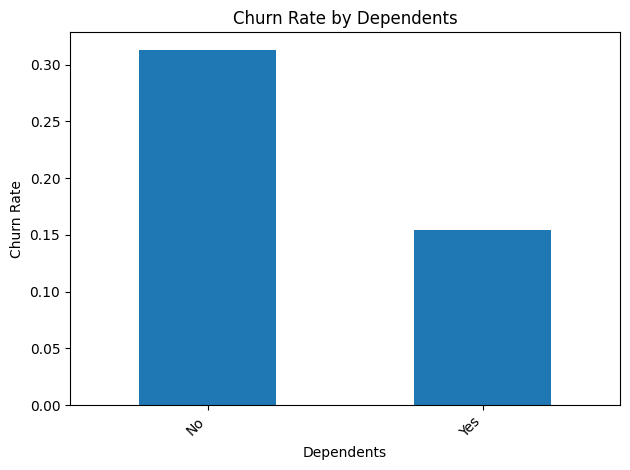

In [145]:
import matplotlib.pyplot as plt

def plot_churn_rate_by_cat(df, col):
    churn_rate = df.groupby(col)["Churn"].mean().sort_values(ascending=False)
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

cat_cols = [
    "Contract", "InternetService", "PaymentMethod",
    "TechSupport", "OnlineSecurity", "OnlineBackup",
    "DeviceProtection", "StreamingTV", "StreamingMovies",
    "PaperlessBilling", "SeniorCitizen", "Partner", "Dependents"
]

for c in cat_cols:
    plot_churn_rate_by_cat(df, c)

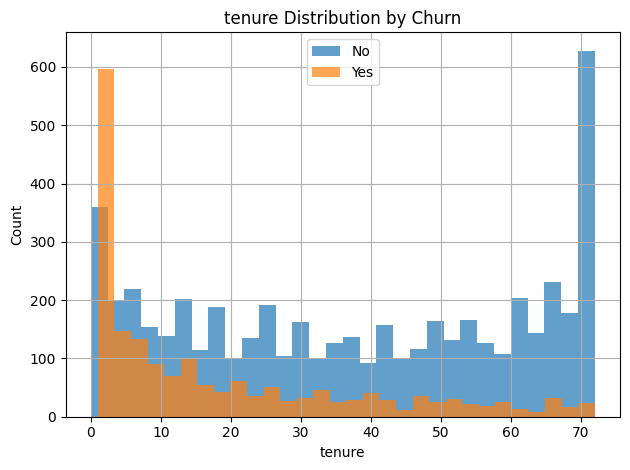

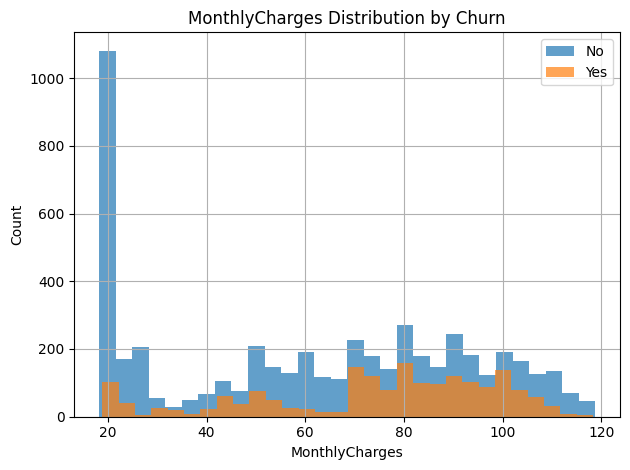

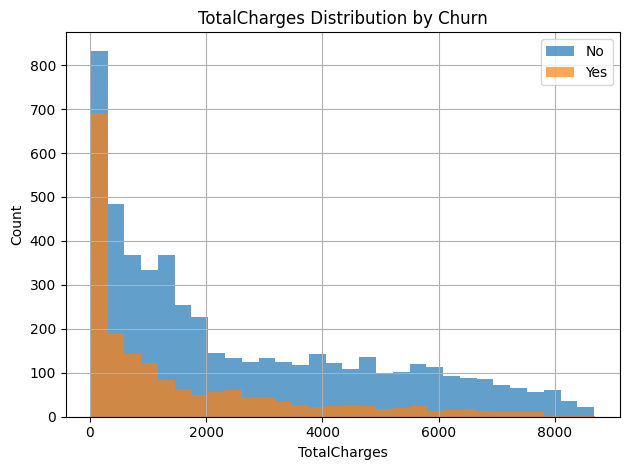

In [146]:
def plot_hist_by_churn(df, col, bins=30):
    plt.figure()
    df[df["Churn"] == 0][col].hist(bins=bins, alpha=0.7)
    df[df["Churn"] == 1][col].hist(bins=bins, alpha=0.7)
    plt.title(f"{col} Distribution by Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(["No", "Yes"])
    plt.tight_layout()
    plt.show()

plot_hist_by_churn(df, "tenure", bins=30)
plot_hist_by_churn(df, "MonthlyCharges", bins=30)

# TotalCharges는 NaN이 있으니 dropna 하고 보세요
plot_hist_by_churn(df.dropna(subset=["TotalCharges"]), "TotalCharges", bins=30)

/tmp/ipython-input-608073420.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["No", "Yes"])


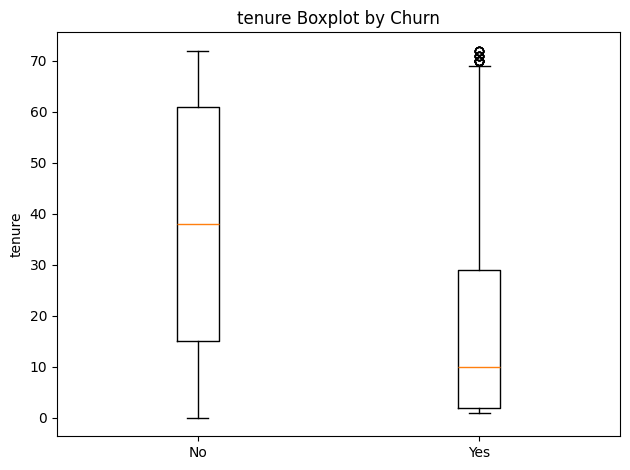

/tmp/ipython-input-608073420.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["No", "Yes"])


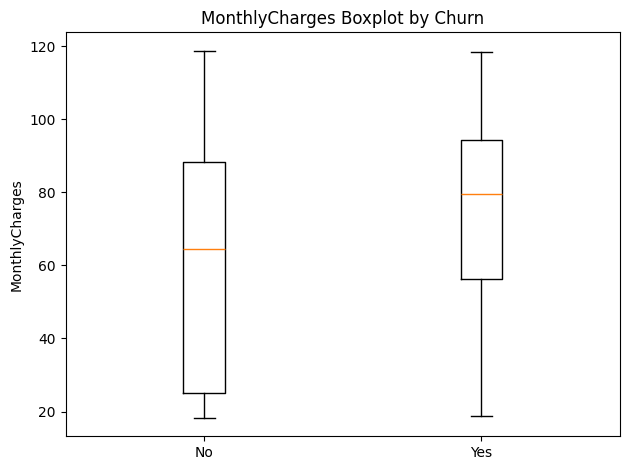

/tmp/ipython-input-608073420.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["No", "Yes"])


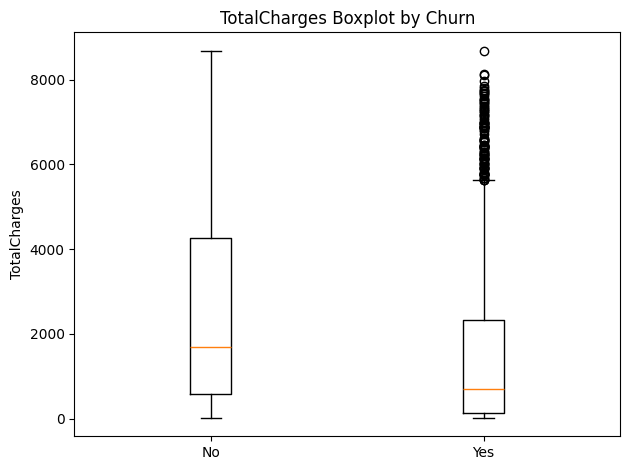

In [147]:
def plot_box_by_churn(df, col):
    plt.figure()
    data = [df[df["Churn"] == 0][col].dropna(),
            df[df["Churn"] == 1][col].dropna()]
    plt.boxplot(data, labels=["No", "Yes"])
    plt.title(f"{col} Boxplot by Churn")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

plot_box_by_churn(df, "tenure")
plot_box_by_churn(df, "MonthlyCharges")
plot_box_by_churn(df, "TotalCharges")

# 전처리

In [148]:
df = df.drop(columns=["customerID"])

In [149]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

In [150]:
# 수치형 컬럼 (int/float)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 범주형 컬럼 (object/category)
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric columns:", num_cols)
print("\nCategorical columns:", cat_cols)

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [151]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [152]:
# 모든 컬럼의 데이터 타입 확인
df_encoded.dtypes

,0
SeniorCitizen,int64
tenure,int64
MonthlyCharges,float64
TotalCharges,float64
Churn,int64
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool


In [153]:
# 수치형 컬럼 (int/float)
num_cols = df_encoded.select_dtypes(include=["int64", "float64"]).columns.tolist()

# 범주형 컬럼 (object/category)
cat_cols = df_encoded.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric columns:", num_cols)
print("\nCategorical columns:", cat_cols)

Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Categorical columns: []


In [154]:
X = df_encoded.drop(columns=["Churn"])
y = df_encoded["Churn"]

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(X_train.shape, X_test.shape)

(5634, 30) (1409, 30)


In [157]:
na_count = df.isna().sum().sort_values(ascending=False)
print("NaN count by column:")
print(na_count[na_count > 0])


NaN count by column:
Series([], dtype: int64)


In [158]:
# 문자열 컬럼만 선택
obj_cols = df.select_dtypes(include=["object"]).columns

blank_count = {}
for col in obj_cols:
    blank_count[col] = (df[col].astype(str).str.strip() == "").sum()

blank_count = pd.Series(blank_count).sort_values(ascending=False)
print("Blank/Empty string count by object column:")
print(blank_count[blank_count > 0])


Blank/Empty string count by object column:
Series([], dtype: int64)


In [160]:
import numpy as np

num_cols = df.select_dtypes(include=["int64", "float64"]).columns

inf_count = np.isinf(df[num_cols]).sum().sort_values(ascending=False)
print("Inf count by numeric column:")
print(inf_count[inf_count > 0])

Inf count by numeric column:
Series([], dtype: int64)


In [161]:
report = pd.DataFrame({
    "dtype": df.dtypes,
    "na_count": df.isna().sum(),
    "na_ratio": (df.isna().mean()).round(4),
    "nunique": df.nunique()
}).sort_values("na_count", ascending=False)

report

,dtype,na_count,na_ratio,nunique
gender,object,0,0.0,2
SeniorCitizen,int64,0,0.0,2
Partner,object,0,0.0,2
Dependents,object,0,0.0,2
tenure,int64,0,0.0,73
PhoneService,object,0,0.0,2
MultipleLines,object,0,0.0,3
InternetService,object,0,0.0,3
OnlineSecurity,object,0,0.0,3
OnlineBackup,object,0,0.0,3


In [163]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix
import pandas as pd

results = []

def evaluate_model(name, model, X_tr, y_tr, X_te, y_te, use_proba=True):
    # 학습
    model.fit(X_tr, y_tr)

    # 예측
    y_pred = model.predict(X_te)

    # 확률 (ROC-AUC 계산용)
    if use_proba:
        y_proba = model.predict_proba(X_te)[:, 1]
        auc = roc_auc_score(y_te, y_proba)
    else:
        auc = None

    # 핵심지표: F1
    f1 = f1_score(y_te, y_pred)

    results.append({
        "Model": name,
        "F1": f1,
        "ROC-AUC": auc
    })

    print(f"\n===== {name} =====")
    print("F1:", round(f1, 4))
    if auc is not None:
        print("ROC-AUC:", round(auc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_te, y_pred))
    print("\nClassification Report:\n", classification_report(y_te, y_pred))


In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)

evaluate_model(
    name="Baseline - Logistic Regression",
    model=lr,
    X_tr=X_train_scaled, y_tr=y_train,
    X_te=X_test_scaled, y_te=y_test,
    use_proba=True
)


===== Baseline - Logistic Regression =====
F1: 0.6092
ROC-AUC: 0.8416
Confusion Matrix:
 [[925 110]
 [162 212]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



| 지표      | 값      | 의미                                             |
| ------- | ------ | ---------------------------------------------- |
| F1      | 0.6092 | **이탈 고객(1) 예측 성능**을 조화평균으로 나타냄                 |
| ROC-AUC | 0.8416 | 모델이 클래스 0/1 구분을 얼마나 잘하는지 전체적으로 평가, 1에 가까울수록 좋음 |


|        | Pred 0 | Pred 1 |
| ------ | ------ | ------ |
| True 0 | 925    | 110    |
| True 1 | 162    | 212    |


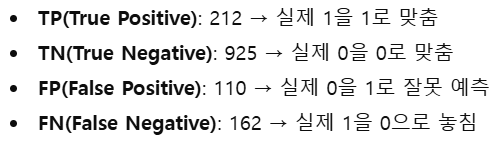

### Classification Report
| 클래스    | Precision | Recall | F1-score | Support |
| ------ | --------- | ------ | -------- | ------- |
| 0 (유지) | 0.85      | 0.89   | 0.87     | 1035    |
| 1 (이탈) | 0.66      | 0.57   | 0.61     | 374     |


|        | Pred 0 | Pred 1 |
| ------ | ------ | ------ |
| True 0 | 925    | 110    |
| True 1 | 162    | 212    |


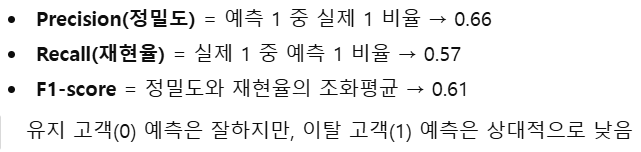

# Decision Tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

evaluate_model(
    name="Interpretable - Decision Tree (max_depth=4)",
    model=dt,
    X_tr=X_train, y_tr=y_train,
    X_te=X_test, y_te=y_test,
    use_proba=True
)


===== Interpretable - Decision Tree (max_depth=4) =====
F1: 0.5714
ROC-AUC: 0.8285
Confusion Matrix:
 [[929 106]
 [182 192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



| 모델                      |         F1 |    ROC-AUC | 이탈 Recall(1) |
| ----------------------- | ---------: | ---------: | -----------: |
| Logistic Regression     | **0.6092** | **0.8416** |     **0.57** |
| Decision Tree (depth=4) |     0.5714 |     0.8285 |         0.51 |


# Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"  # 이탈(1) 클래스 비중 고려
)

evaluate_model(
    name="High-Performance - RandomForest",
    model=rf,
    X_tr=X_train, y_tr=y_train,
    X_te=X_test, y_te=y_test,
    use_proba=True
)


===== High-Performance - RandomForest =====
F1: 0.5574
ROC-AUC: 0.8246
Confusion Matrix:
 [[925 110]
 [187 187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



| 모델                                      |         F1 |    ROC-AUC | 이탈 Precision(1) | 이탈 Recall(1) |
| --------------------------------------- | ---------: | ---------: | --------------: | -----------: |
| **Baseline - Logistic Regression**      | **0.6092** | **0.8416** |            0.66 |     **0.57** |
| Interpretable - Decision Tree (depth=4) |     0.5714 |     0.8285 |            0.64 |         0.51 |
| High-Performance - RandomForest         |     0.5574 |     0.8246 |            0.63 |         0.50 |


# Part 3

In [167]:
feature_names = X_train.columns  # 더미 인코딩된 컬럼명 그대로

# 계수 꺼내기
coef = lr.coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef
})

# 절대값 기준 영향력 크기 (가장 영향 큰 요인 찾기)
coef_df["abs_coef"] = coef_df["coef"].abs()

# Top 5
top5 = coef_df.sort_values("abs_coef", ascending=False).head(5)
top5

,feature,coef,abs_coef
1,tenure,-1.219639,1.219639
2,MonthlyCharges,-0.921369,0.921369
10,InternetService_Fiber optic,0.778760,0.778760
25,Contract_Two year,-0.588975,0.588975
3,TotalCharges,0.497246,0.497246


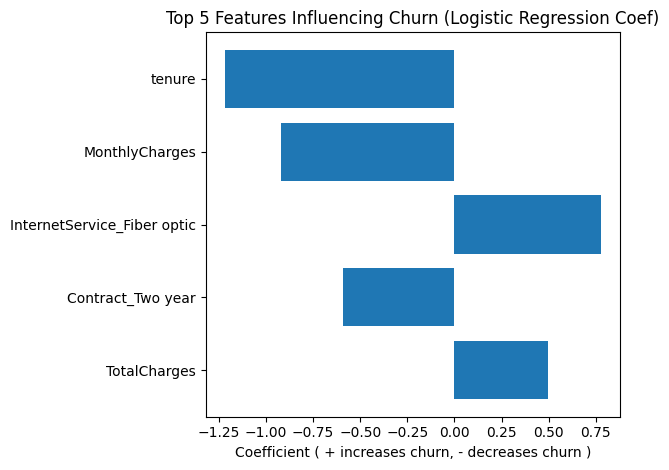

In [168]:
plt.figure()
plt.barh(top5["feature"][::-1], top5["coef"][::-1])  # 보기 좋게 역순
plt.title("Top 5 Features Influencing Churn (Logistic Regression Coef)")
plt.xlabel("Coefficient ( + increases churn, - decreases churn )")
plt.tight_layout()
plt.show()

# RandomForest의 feature importance(변수 중요도) Top 10
모델로 확인 (다른 변수 영향 통제한 뒤에도 중요한가?)

가설이 “진짜로 독립적으로 영향을 주는가”는 결국 모델에서 확인하는 게 좋다.

In [169]:
importances = rf.feature_importances_
feat_imp = pd.DataFrame({"feature": X_train.columns, "importance": importances})
feat_imp.sort_values("importance", ascending=False).head(10)

,feature,importance
3,TotalCharges,0.177844
1,tenure,0.164403
2,MonthlyCharges,0.151054
25,Contract_Two year,0.059944
10,InternetService_Fiber optic,0.042323
28,PaymentMethod_Electronic check,0.036455
24,Contract_One year,0.029412
13,OnlineSecurity_Yes,0.028447
4,gender_Male,0.025604
26,PaperlessBilling_Yes,0.024087
